In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Heart Failure Clinical Records

[link to data source](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records)

1. SEX: 0-woman, 1-man. 
2. TIME: duration in days between hospitalisation and DEATH_EVENT.


In [2]:
def read_file(path):
    df = pd.read_csv(path)
    return df

def devide_num_cat(data):
    hfcr_categorial_values = data[['anaemia', 'diabetes', 'high_blood_pressure','sex', 'smoking','DEATH_EVENT']]
    hfcr_numerical_values = data[['age', 'creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']]
    
    return hfcr_categorial_values, hfcr_numerical_values


data = read_file('heart_failure_clinical_records_dataset.csv')
cat, num = devide_num_cat(data)
num.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


Describing some basic information about numerical variables provided in the data set. 

### Death rate

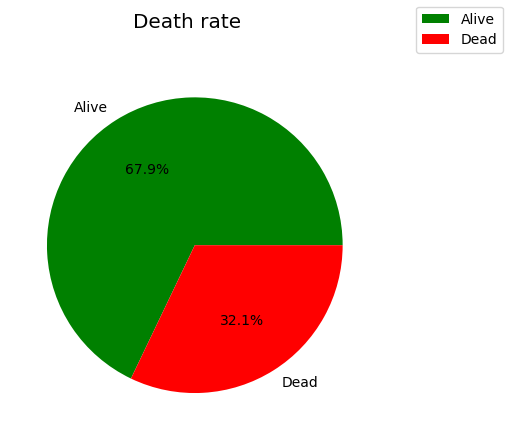

In [26]:
labels = ['Alive','Dead']

#counting how many times the event caused patient death
death_counts = cat['DEATH_EVENT'].value_counts()

#displaying the graph representing the death rate of heart failure 
fig, ax = plt.subplots()
ax.pie(death_counts, labels=labels, autopct='%1.1f%%', colors=['green', 'red'])
fig.legend()
fig.suptitle('Death rate', fontsize='x-large')

plt.show()


### Number of Men and Women in specified age groups where the problem occurred

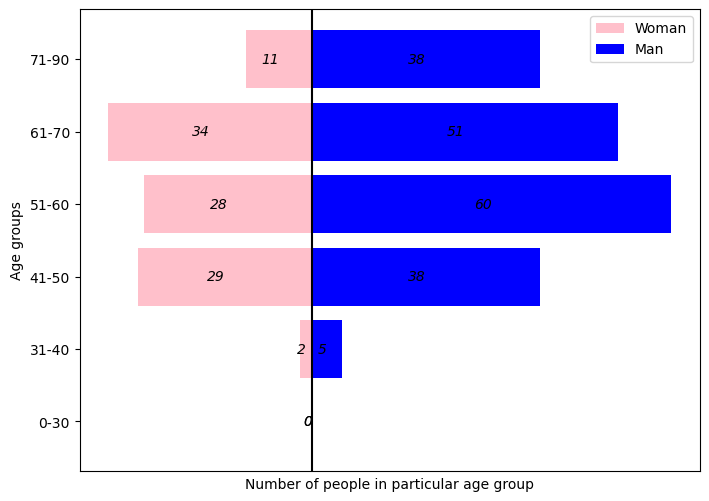

In [92]:
age_groups = ['0-30','31-40', '41-50', '51-60', '61-70', '71-90']
bins = [0, 30, 40, 50, 60, 70, 90]

#assigning patients into particular age_group
data['age_group'] = pd.cut(data['age'], bins=bins, labels=age_groups)

#devide man and woman group
woman = data[data['sex'] == 0]
man = data[data['sex'] == 1]

#couting the number of woman and man in each age range
#reindex method for setting values in proper order
woman_count = woman['age_group'].value_counts().reindex(age_groups)
man_count = man['age_group'].value_counts().reindex(age_groups)

fig, ax = plt.subplots(figsize=(8, 6))

#creating two subplots
ax.barh(age_groups, -woman_count, color='pink', label='Woman')
ax.barh(age_groups, man_count, color='blue', label='Man')

#adding the number of people in parcitular age_group into the 
for i in range(len(age_groups)):
    ax.text(-woman_count.iloc[i] * 0.5, i, str(woman_count.iloc[i]), ha='right', va='center', fontstyle='italic')
    ax.text(man_count.iloc[i] * 0.5, i, str(man_count.iloc[i]), ha='right', va='center', fontstyle='italic')

#black line in the middle and deteling xticks numbers 
ax.axvline(0, color='black', linewidth=1.5)
ax.set_xticks([])

plt.xlabel('Number of people in particular age group')
plt.ylabel('Age groups')
plt.legend()
plt.show()


### Plots representing legitimate and observerd level of particular substations. 

Healthy, normal values. 

**CPK** 10 - 120 mcg/L\
**Ejection fraction** 50 - 70 %\
**Platelets** 150,000 - 450,000\
**serum_creatinine** 0.7 - 1.3 mg/dL\
**serum_sodium** 135 - 145 mEq/L\ 


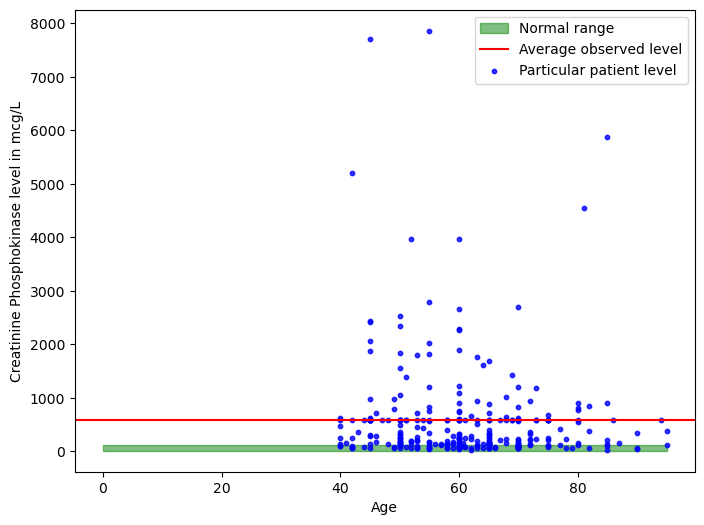

In [107]:
#CPK
average_observed_lvl = num['creatinine_phosphokinase'].mean()


fig, ax = plt.subplots(figsize=(8, 6))

#excepted range of CPK level of healthy adult 
ax.fill_betweenx(y=[10, 120], x1=0,x2= num['age'].max(), color='green', alpha=0.5, label= 'Normal range')


#average CPK lvl of patient with heart failure record 
ax.axhline(y=average_observed_lvl, color='red', linewidth=1.5, label='Average observed level')

sorted_data = data.sort_values(by='age')
ax.scatter(sorted_data['age'], sorted_data['creatinine_phosphokinase'], color = 'blue', 
           label='Particular patient level', alpha=0.8, s=10)



plt.xlabel('Age')
plt.ylabel('Creatinine Phosphokinase level in mcg/L')
plt.legend()
plt.show()



As we can conclude from the plot above, level of Creatinine Phosphokinase isn't directly associated with age. 
Moreover most of the patients include in the range between 0 and average level. Only few have normal, healthy CPK result.


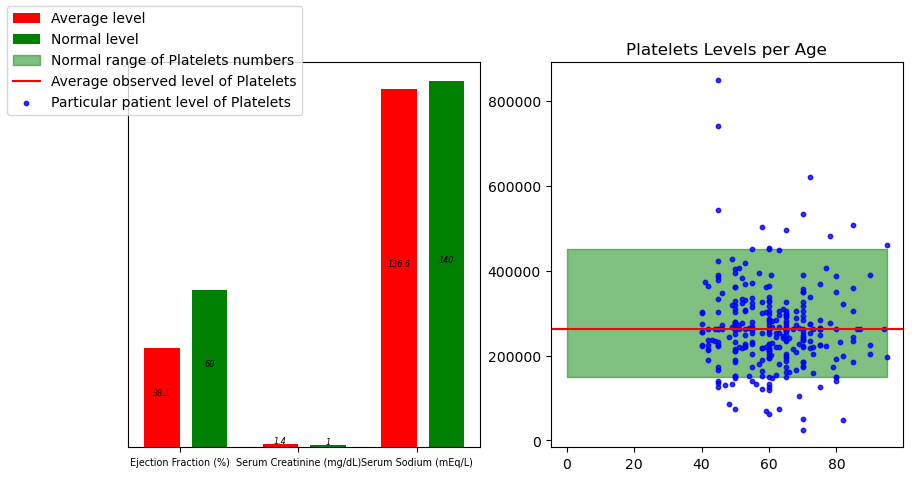

In [149]:
#Other numerical values 

#calculation of the average figures 
average_ejection_fraction_lvl = num['ejection_fraction'].mean()
average_platelets_lvl = num['platelets'].mean()
average_serum_creatinine_lvl = num['serum_creatinine'].mean()
average_serum_sodium_lvl = num['serum_sodium'].mean()

categories = ['Ejection Fraction (%)', 'Serum Creatinine (mg/dL)', 'Serum Sodium (mEq/L)']

averages = [average_ejection_fraction_lvl, average_serum_creatinine_lvl, average_serum_sodium_lvl]

#average value of normal levels, expect Platelets, because I think they need another graph cause of the range. 
normal_values = [60, 1, 140]

fig, ax = plt.subplots(1,2, figsize=(10, 5))

index = np.arange(len(categories))

#first plot representing average observed levels and average normal ones 
bar_width = 0.3
bar1 = ax[0].bar(index, averages, bar_width, color='red', label='Average level')
bar2 = ax[0].bar(index + bar_width + 0.1, normal_values, bar_width, color='green', label='Normal level')

#adding values into the bars 
for i in range(len(categories)):
    ax[0].text(index[i], averages[i]/2, f"{averages[i]:.1f}",ha='center', va='bottom', fontstyle='italic',
               fontsize = 'xx-small')
    ax[0].text(index[i] + bar_width + 0.1, normal_values[i]/2, str(normal_values[i]),ha='center', 
               va='bottom', fontstyle='italic', fontsize = 'xx-small')

ax[0].set_yticks([])
ax[0].set_xticks(index + bar_width / 2)
ax[0].set_xticklabels(categories, size='x-small')


#second plot for Platelets
ax[1].fill_betweenx(y=[150000, 450000], x1=0,x2= num['age'].max(), color='green', alpha=0.5, label= 'Normal range of Platelets numbers')

#average platelets lvl of patient with heart failure record. 
#done in the same way as the plot above with CPK level 
ax[1].axhline(y=average_platelets_lvl, color='red', linewidth=1.5, label='Average observed level of Platelets')

sorted_data = data.sort_values(by='age')
ax[1].scatter(sorted_data['age'], sorted_data['platelets'], color = 'blue', 
           label='Particular patient level of Platelets', alpha=0.8, s=10)

ax[1].set_title('Platelets Levels per Age')

fig.legend(loc = 'upper left')

plt.show()


As noted above, on the first graph, the average results of patients with heart failure are quite similar as the average normal ones. Data was compressed to this one graph, because I don't think it's necessary to present 4 similat plots, when he differences are tiny. 
On the second plot, we can observe that most of the patients are in the proper range of number of Plateles in the human organism. 

### Correlation between particuar disease and death as a result of heart failure. 

In [161]:
particular_collumns = ['DEATH_EVENT', 'smoking', 'diabetes', 'high_blood_pressure', 'anaemia']
correlation_data = data[particular_collumns]

death_per = {}

#avoiding DEATH_EVENT and calculating the death % correlated to specific disease 
for col in particular_collumns[1:]:
    death_rate = correlation_data[correlation_data[col] == 1]['DEATH_EVENT'].sum()
    total_sick = correlation_data[col].sum()
    
    if total_sick >0:
        death_per[col] = (death_rate/total_sick) * 100
    else:
        death_per[col] = 0
        
dp = pd.DataFrame(death_per.items(), columns=['Disease', 'Death rate'])
dp.head()

,Disease,Death rate
0,smoking,31.250000
1,diabetes,32.000000
2,high_blood_pressure,37.142857
3,anaemia,35.658915


As noted above, patients with high blood pressure are most likely to die after heart failure event. 

### Correlation between death event and each feature 

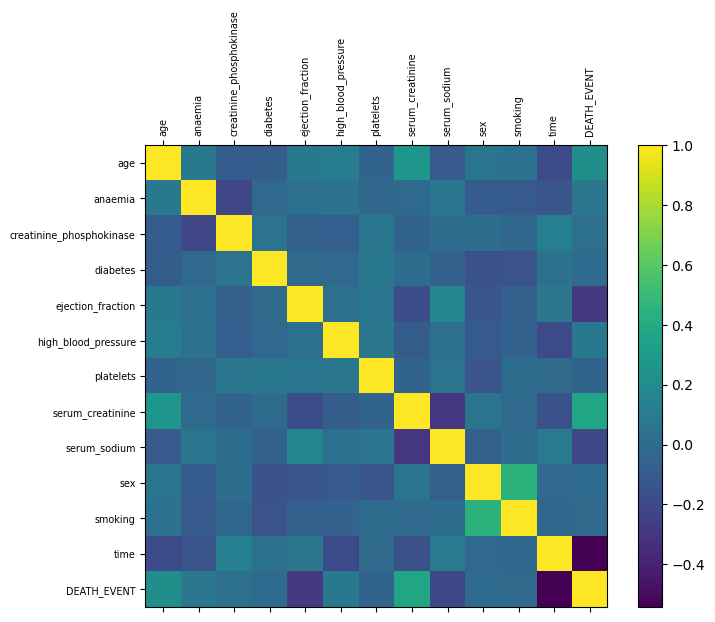

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))
df_corr = data.corr(method="spearman")
cax = ax.matshow(df_corr)

#creating a colorbar to represent the values on the plot 
cb = plt.colorbar(cax)
cb.ax.tick_params(labelsize=10)

#listing column names 
column_names = data.columns.values.tolist()
#setting labels and ticks 
ax.set_xticks(np.arange(len(column_names)))
ax.set_yticks(np.arange(len(column_names)))
ax.set_xticklabels(column_names, rotation=90, size='x-small')
ax.set_yticklabels(column_names, size='x-small')

plt.show()

On the plot above we can observe a correlation between every data column provided in the dataset. The most positive correlation we can see between smoking and sex, so there is a more man smoking than woman. Also, we can observe a high correlation between serum_creatinine and death event. On the other side the negative correlation can be seen with time and death event, so with the increasing time patient spend in the hospital after the accident, it's less probable that he will die. More time under observation = less chance of death. 

### Simple regression to show correlation between time and death.  

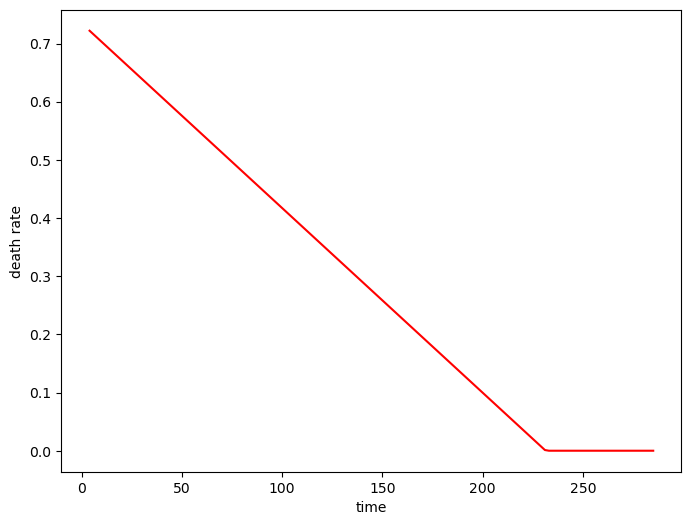

In [4]:
from sklearn.linear_model import LinearRegression

x = data['time'].values.reshape(-1, 1)
y = data['DEATH_EVENT']

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)
y_pred = np.clip(y_pred, 0, 1) #limitation to 0 

plt.figure(figsize=(8, 6))

plt.plot(x, y_pred, color='red')
plt.xlabel('time')
plt.ylabel('death rate')

plt.show()

Really simply regression showing that with time spend in the hospital after the accident the chance of death is getting lower.